In [63]:
#importo librerias
import pandas as pd
import json
#%pip install matplotlib
import matplotlib.pyplot as plt

In [2]:
# Función para leer un archivo .jsonlines
def read_jsonlines(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data = [json.loads(line) for line in lines]
    return data

file_path = 'D:/JENN/Maestria IACD/ETL/ETL_Class_workshop_II/MLA_100k.jsonlines'

data= pd.read_json(file_path, lines=True)

In [3]:
data_df = pd.DataFrame(data)
# Cuando trabajas con archivos .jsonlines, es común convertir los datos a un DataFrame de pandas 
# para facilitar su manipulación y análisis. 
# Pandas proporciona funciones específicas para leer archivos .jsonlines directamente en un DataFrame, 
# lo cual es más eficiente y conveniente.

In [4]:
data_df.head(5)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [5]:
# Obtener las dimensiones del DataFrame
dimensiones = data_df.shape

# Mostrar las dimensiones
print(f"Dimensiones del DataFrame: {dimensiones}")
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Dimensiones del DataFrame: (20000, 48)
Número de filas: 20000
Número de columnas: 48


In [6]:
# Guardar una copia de las columnas originales
columnas_originales = data_df.columns.tolist()
columnas_originales

['seller_address',
 'warranty',
 'sub_status',
 'condition',
 'seller_contact',
 'deal_ids',
 'base_price',
 'shipping',
 'non_mercado_pago_payment_methods',
 'seller_id',
 'variations',
 'location',
 'site_id',
 'listing_type_id',
 'price',
 'attributes',
 'buying_mode',
 'tags',
 'listing_source',
 'parent_item_id',
 'coverage_areas',
 'category_id',
 'descriptions',
 'last_updated',
 'international_delivery_mode',
 'pictures',
 'id',
 'official_store_id',
 'differential_pricing',
 'accepts_mercadopago',
 'original_price',
 'currency_id',
 'thumbnail',
 'title',
 'automatic_relist',
 'date_created',
 'secure_thumbnail',
 'stop_time',
 'status',
 'video_id',
 'catalog_product_id',
 'subtitle',
 'initial_quantity',
 'start_time',
 'permalink',
 'geolocation',
 'sold_quantity',
 'available_quantity']

In [7]:
# Verificar la cantidad de valores nulos en cada columna
print("Cantidad de valores nulos por columna:")
print(data_df.isnull().sum())

Cantidad de valores nulos por columna:
seller_address                          0
warranty                            12084
sub_status                              0
condition                               0
seller_contact                      19596
deal_ids                                0
base_price                              0
shipping                                0
non_mercado_pago_payment_methods        0
seller_id                               0
variations                              0
location                                0
site_id                                 0
listing_type_id                         0
price                                   0
attributes                              0
buying_mode                             0
tags                                    0
listing_source                          0
parent_item_id                       4588
coverage_areas                          0
category_id                             0
descriptions                         

In [8]:
# Eliminar columnas completamente vacias
data_df = data_df.dropna(axis=1, how='all')

In [9]:
#Eliminar columnas con pocos datos e ineccesarias
# Columnas a eliminar
columnas_pocos_datos = ['seller_contact', 'official_store_id', 'original_price', 'video_id', 'catalog_product_id', ]
columnas_ineccesarias = ['pictures','thumbnail','secure_thumbnail','permalink','tags']

# Elimina las columnas del DataFrame
data_df = data_df.drop(columns=columnas_pocos_datos + columnas_ineccesarias)

# Muestra las primeras filas del DataFrame resultante para verificar
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
data_df.head(5)

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26T18:08:34.000Z,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09T23:57:10.000Z,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,[],{},MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05T16:03:50.306Z,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,[],{},MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28T13:37:41.000Z,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [10]:
# Explorar los datos
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   seller_address                    20000 non-null  object             
 1   warranty                          7916 non-null   object             
 2   sub_status                        20000 non-null  object             
 3   condition                         20000 non-null  object             
 4   deal_ids                          20000 non-null  object             
 5   base_price                        20000 non-null  float64            
 6   shipping                          20000 non-null  object             
 7   non_mercado_pago_payment_methods  20000 non-null  object             
 8   seller_id                         20000 non-null  int64              
 9   variations                        20000 non-null  object     

In [11]:
# Estadisticas descritivas de los datos
print(data_df.describe())

         base_price     seller_id         price  initial_quantity  \
count  2.000000e+04  2.000000e+04  2.000000e+04      20000.000000   
mean   6.168290e+04  8.440620e+07  6.168291e+04         35.161750   
std    7.857693e+06  5.493543e+07  7.857693e+06        424.722852   
min    1.000000e+00  3.118900e+04  1.000000e+00          1.000000   
25%    9.000000e+01  3.936005e+07  9.000000e+01          1.000000   
50%    2.500000e+02  7.631063e+07  2.500000e+02          1.000000   
75%    7.999900e+02  1.328111e+08  7.999900e+02          2.000000   
max    1.111111e+09  1.944976e+08  1.111111e+09       9999.000000   

       sold_quantity  available_quantity  
count    20000.00000        20000.000000  
mean         2.65485           34.898750  
std         51.35406          424.430612  
min          0.00000            1.000000  
25%          0.00000            1.000000  
50%          0.00000            1.000000  
75%          0.00000            2.000000  
max       6065.00000         9999.

In [12]:
# Verificar loss tipos de datos de cada columna
print(data_df.dtypes)

seller_address                                   object
warranty                                         object
sub_status                                       object
condition                                        object
deal_ids                                         object
base_price                                      float64
shipping                                         object
non_mercado_pago_payment_methods                 object
seller_id                                         int64
variations                                       object
location                                         object
site_id                                          object
listing_type_id                                  object
price                                           float64
attributes                                       object
buying_mode                                      object
listing_source                                   object
parent_item_id                                  

In [13]:
#trasnformación de tipos de datos
date_columns = ['start_time','stop_time','last_updated', 'date_created']
numeric_colums = ['base_price','price','initial_quantity','sold_quantity','available_quantity']
categorical_columns = ['warranty', 'condition', 'listing_type_id', 'buying_mode', 'category_id', 'status']

data_df[date_columns] = data_df[date_columns].apply(pd.to_datetime, errors='coerce')  # Convertir a datetime
data_df[numeric_colums] = data_df[numeric_colums].apply(pd.to_numeric, errors='coerce')  # Convertir a numerico
data_df[categorical_columns] = data_df[categorical_columns].astype('category') # convertir a categorico
data_df

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",NaN,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",NaN,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",NaN,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,[],{},MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,[],{},MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,"{'comment': '', 'longitude': -58.5644495, 'id'...",NaN,[],used,[],90.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",109216122,[],{},MLA,bronze,90.0,[],buy_it_now,,MLA571992975,[],MLA48853,[{'id': 'MLA581965009-932715116'}],2015-09-29 03:14:17+00:00,none,MLA581965009,True,ARS,Dios. La Existencia De Dios - Garrigou - Lagrange,False,2015-09-29 03:14:16+00:00,2015-11-28 03:14:16+00:00,active,1,2015-09-29 03:14:16+00:00,"{'latitude': -34.5626035, 'longitude': -58.564...",0,1
19996,"{'comment': '', 'longitude': -58.4754577, 'id'...",NaN,[],used,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...",[],99763907,[{'attribute_combinatio

#### LIMPIEZA Y TRANSFORMACIÓN DE DICCIONARIOS

In [14]:
# Función para identificar las columnas que contienen diccionarios
def columnas_con_diccionarios(data):
    columnas_diccionario = []
    for col in data.columns:
        if data[col].apply(lambda x: isinstance(x, dict)).any():
            columnas_diccionario.append(col)
    return columnas_diccionario

In [15]:
# Fucnión para verificar si un diccionario está vacío
def es_diccionario_vacio(diccionario):
    return isinstance(diccionario, dict) and len(diccionario) == 0

In [16]:
# Crear una lista con las columnas que tienen diccionarios
diccionarios = columnas_con_diccionarios(data_df)
diccionarios


['seller_address', 'shipping', 'location', 'geolocation']

In [17]:
# Identificar columnas con diccionarios vacíos
# columnas_diccionario_vacios = [col for col in columnas_diccionarios if data_df[col].apply(es_diccionario_vacio).any()]
# print("Columnas que contienen diccionarios vacíos:", columnas_diccionario_vacios)
# columnas_diccionario_vacios

- Análisis del diccionario seller_address

In [18]:
# Creo data frame para la columan seller_address que contiene un diccionario
df_seller_address = pd.json_normalize(data_df['seller_address'].dropna())
print("DataFrame para la columna 'seller_address':")
df_seller_address_df = pd.DataFrame(df_seller_address)
df_seller_address_df.head(5)

DataFrame para la columna 'seller_address':


,comment,longitude,id,address_line,latitude,zip_code,country.name,country.id,search_location.neighborhood.name,search_location.neighborhood.id,search_location.state.name,search_location.state.id,search_location.city.name,search_location.city.id,city.name,city.id,state.name,state.id
0,,-58.398671,78162842,,-34.62807,,Argentina,AR,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C
1,,-58.505917,105272448,,-34.593552,,Argentina,AR,Villa Devoto,TUxBQlZJTDYzNzZa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Buenos Aires,,Capital Federal,AR-C
2,,-58.414395,103489016,,-34.623391,,Argentina,AR,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C
3,,-58.492921,109827639,,-34.628189,,Argentina,AR,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,TUxBQ0NBUGZlZG1sYQ,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C
4,,-58.549504,2825909,,-34.634655,,Argentina,AR,,,Bs.As. G.B.A. Oeste,TUxBUEdSQWVmNTVm,Tres de febrero,TUxBQ1RSRTMxODE5NA,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B


In [19]:
print(df_seller_address_df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   comment                            20000 non-null  object
 1   longitude                          20000 non-null  object
 2   id                                 20000 non-null  int64 
 3   address_line                       20000 non-null  object
 4   latitude                           20000 non-null  object
 5   zip_code                           20000 non-null  object
 6   country.name                       20000 non-null  object
 7   country.id                         20000 non-null  object
 8   search_location.neighborhood.name  20000 non-null  object
 9   search_location.neighborhood.id    20000 non-null  object
 10  search_location.state.name         20000 non-null  object
 11  search_location.state.id           20000 non-null  object
 12  sear

In [20]:
# con las columnas de longitud y latitud basta para posteriormente identificar la ubicación del vendedor.
# por tanto esta información es suficiente para el análisis y se integar al data set principal.
# Eliminar la columna 'seller_address' del DataFrame original
data_df['seller_address_latitude'] = df_seller_address_df['latitude']
data_df['seller_address_longitude'] = df_seller_address_df['longitude']
data_df = data_df.drop(columns='seller_address') 

In [21]:
data_df.head(5)

,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,geolocation,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude
0,NaN,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1,-34.62807,-58.398671
1,NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1,-34.593552,-58.505917
2,NaN,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1,-34.623391,-58.414395
3,NaN,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,[],{},MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1,-34.628189,-58.492921
4,MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,[],{},MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1,-34.634655,-58.549504


- Análisis del diccionario shipping

In [22]:
# Creo data frame para la columan shipping que contiene un diccionario
df_shipping = pd.json_normalize(data_df['shipping'].dropna())
print("DataFrame para la columna 'shipping':")
df_shipping_df = pd.DataFrame(df_shipping)
df_shipping_df.head(5)

DataFrame para la columna 'shipping':


,local_pick_up,methods,tags,free_shipping,mode,dimensions,free_methods
0,True,[],[],False,not_specified,None,NaN
1,True,[],[],False,me2,None,NaN
2,True,[],[],False,me2,None,NaN
3,True,[],[],False,me2,None,NaN
4,True,[],[],False,not_specified,None,NaN


In [23]:
print(df_shipping_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   local_pick_up  20000 non-null  bool  
 1   methods        19412 non-null  object
 2   tags           20000 non-null  object
 3   free_shipping  20000 non-null  bool  
 4   mode           20000 non-null  object
 5   dimensions     4 non-null      object
 6   free_methods   588 non-null    object
dtypes: bool(2), object(5)
memory usage: 820.4+ KB
None


In [24]:
# Estrategias como envio gratis y modo de envio pueden indicar promociones de ingreso al mercado
# por tanto esta información podría permitir identificar productos nuevos
# Eliminar la columna 'shipping' del DataFrame original
data_df['shipping_free_shipping'] = df_shipping_df['free_shipping']
data_df['shipping_mode'] = df_shipping_df['mode']
data_df = data_df.drop(columns='shipping')
data_df.head(5)

,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,geolocation,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,[],new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,[],used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1,-34.593552,-58.505917,False,me2
2,NaN,[],used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1,-34.623391,-58.414395,False,me2
3,NaN,[],new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],{},MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,[],used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],{},MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1,-34.634655,-58.549504,False,not_specified


- Análisis del diccionario location

In [25]:
# Creo data frame para la columan location que contiene un diccionario
df_location = pd.json_normalize(data_df['location'].dropna())
print("DataFrame para la columna 'location':")
df_location_df = pd.DataFrame(df_location)
df_location_df.head(5)

DataFrame para la columna 'location':


,open_hours,longitude,address_line,latitude,zip_code,neighborhood.name,neighborhood.id,country.name,country.id,city.name,city.id,state.name,state.id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(df_location_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   open_hours         404 non-null    object
 1   longitude          404 non-null    object
 2   address_line       404 non-null    object
 3   latitude           404 non-null    object
 4   zip_code           404 non-null    object
 5   neighborhood.name  404 non-null    object
 6   neighborhood.id    404 non-null    object
 7   country.name       404 non-null    object
 8   country.id         404 non-null    object
 9   city.name          404 non-null    object
 10  city.id            404 non-null    object
 11  state.name         404 non-null    object
 12  state.id           404 non-null    object
dtypes: object(13)
memory usage: 2.0+ MB
None


In [27]:
# todas las conlumnas tienen una cantidad pequena de datos, en comparacion con el data set principal, por tanto no se integran al data set principal
# Eliminar la columna 'location' del DataFrame original
data_df = data_df.drop(columns='location')
data_df.head(5)

,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,geolocation,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,[],new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,[],used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1,-34.593552,-58.505917,False,me2
2,NaN,[],used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1,-34.623391,-58.414395,False,me2
3,NaN,[],new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,[],used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1,-34.634655,-58.549504,False,not_specified


- Análisis del diccionario geolocation

In [28]:
# Creo data frame para la columan location que contiene un diccionario
df_geolocation = pd.json_normalize(data_df['geolocation'].dropna())
print("DataFrame para la columna 'geolocation':")
df_geolocation_df = pd.DataFrame(df_geolocation)
df_geolocation_df.head(5)

DataFrame para la columna 'geolocation':


,latitude,longitude
0,-34.62807,-58.398671
1,-34.593552,-58.505917
2,-34.623391,-58.414395
3,-34.628189,-58.492921
4,-34.634655,-58.549504


In [29]:
# los datos del diccionario geolocation ya están incluidos en las columnas de latitud y longitud de la columna seller_address
# por tanto no se integran al data set principal
# Eliminar la columna 'geolocation' del DataFrame original
data_df = data_df.drop(columns='geolocation')
data_df.head(5)

,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,[],new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,[],used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,[],used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,[],new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,[],used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


##### LIMPIEZA Y TRANSFORMACIÓN DE LISTAS

In [30]:
# Función para verificar si una columna contiene listas
def es_lista(data):
    columnas_lista = []
    for col in data.columns:
        if data[col].apply(lambda x: isinstance(x, list)).any():
            columnas_lista.append(col)
    return columnas_lista

In [31]:
# Función para verificar si una lista está vacía
def es_lista_vacia(lista):
    return isinstance(lista, list) and len(lista) == 0

In [32]:
# Crear una lista con las columnas que tienen listas
listas = es_lista(data_df)
listas

['sub_status',
 'deal_ids',
 'non_mercado_pago_payment_methods',
 'variations',
 'attributes',
 'coverage_areas',
 'descriptions']

In [33]:
# Identificar las columnas con listas vacías
columnas_lista_vacios = [col for col in listas if data_df[col].apply(es_lista_vacia).all]
print("Columnas que contienen listas vacías:", columnas_lista_vacios)
columnas_lista_vacios

Columnas que contienen listas vacías: ['sub_status', 'deal_ids', 'non_mercado_pago_payment_methods', 'variations', 'attributes', 'coverage_areas', 'descriptions']


['sub_status',
 'deal_ids',
 'non_mercado_pago_payment_methods',
 'variations',
 'attributes',
 'coverage_areas',
 'descriptions']

- Análisis de la columna sub_status que tiene listas

In [34]:
# Creo data frame para la columan sub_status que contiene una lista   
df_sub_status = pd.json_normalize(data_df['sub_status'].dropna())
print("DataFrame para la columna 'sub_status':")
df_non_sub_status_df = pd.DataFrame(df_sub_status)
df_non_sub_status_df.head(5)


DataFrame para la columna 'sub_status':


,0
0,None
1,None
2,None
3,None
4,None


In [35]:
print(df_non_sub_status_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       197 non-null    object
dtypes: object(1)
memory usage: 156.4+ KB
None


In [36]:
# hay una cantidad pequeña de datos en comparación con el data set principal, por tanto no se integran al data set principal
# Eliminar la columna 'sub_status' del DataFrame original
data_df = data_df.drop(columns='sub_status')
data_df.head(5)

,warranty,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


- Análisis de la columna deal_ids que contine listas

In [37]:
# Creo data frame para la columan sub_status que contiene una lista   
df_deal_ids = pd.json_normalize(data_df['deal_ids'].dropna())
print("DataFrame para la columna 'deal_ids':")
df_deal_ids_df = pd.DataFrame(df_deal_ids)
df_deal_ids_df.head(5)


DataFrame para la columna 'deal_ids':


,0,1,2,3
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [38]:
print(df_deal_ids_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       47 non-null     object
 1   1       6 non-null      object
 2   2       3 non-null      object
 3   3       1 non-null      object
dtypes: object(4)
memory usage: 625.1+ KB
None


In [39]:
# hay una cantidad pequeña de datos en comparación con el data set principal, por tanto no se integran al data set principal
# Eliminar la columna 'deal_ids' del DataFrame original
data_df = data_df.drop(columns='deal_ids')
data_df.head(5)

,warranty,condition,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,new,80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,used,60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,new,580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,used,30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


- Análisis de la columna non_mercado_pago_payment_methods que contiene listas

In [40]:
# Creo data frame para la columan df_non_mercado_pago_payment_methods que contiene una lista   
df_non_mercado_pago_payment_methods = pd.json_normalize(data_df['non_mercado_pago_payment_methods'].dropna())
print("DataFrame para la columna 'non_mercado_pago_payment_methods':")
df_non_mercado_pago_payment_methods_df = pd.DataFrame(df_non_mercado_pago_payment_methods)
df_non_mercado_pago_payment_methods_df.head(5)

DataFrame para la columna 'non_mercado_pago_payment_methods':


,0,1,2,3,4,5,6,7,8,9,10,11
0,"{'description': 'Transferencia bancaria', 'id'...","{'description': 'Acordar con el comprador', 'i...","{'description': 'Efectivo', 'id': 'MLAMO', 'ty...",None,None,None,None,None,None,None,None,None
1,"{'description': 'Transferencia bancaria', 'id'...","{'description': 'Efectivo', 'id': 'MLAMO', 'ty...",None,None,None,None,None,None,None,None,None,None
2,"{'description': 'Transferencia bancaria', 'id'...","{'description': 'Tarjeta de crédito', 'id': 'M...","{'description': 'Efectivo', 'id': 'MLAMO', 'ty...",None,None,None,None,None,None,None,None,None
3,"{'description': 'Transferencia bancaria', 'id'...","{'description': 'Tarjeta de crédito', 'id': 'M...","{'description': 'Efectivo', 'id': 'MLAMO', 'ty...",None,None,None,None,None,None,None,None,None
4,"{'description': 'Transferencia bancaria', 'id'...","{'description': 'Acordar con el comprador', 'i...","{'description': 'Efectivo', 'id': 'MLAMO', 'ty...",None,None,None,None,None,None,None,None,None


In [41]:
# las columnas 0, 1, y 2 contienen los diferentes métodos de pago para la compra del producto
# no ofrecen información relevante para determinar si el producto es nuevo o no, no se incluyen en el dat frame original.
# Eliminar la columna 'non_mercado_pago_payment_methods' del DataFrame original
data_df = data_df.drop(columns='non_mercado_pago_payment_methods')  
data_df.head(5)

,warranty,condition,base_price,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,new,80.0,74952096,[],MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,used,2650.0,42093335,[],MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,used,60.0,133384258,[],MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,new,580.0,143001605,[],MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,used,30.0,96873449,[],MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


- Análisis de columna variations que contiene listas

In [42]:
# Creo data frame para la columan variations que contiene una lista   
df_variations = pd.json_normalize(data_df['variations'].dropna())
print("DataFrame para la columna 'variations':")
df_variations_df = pd.DataFrame(df_variations)
df_variations_df.head(5)


DataFrame para la columna 'variations':


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [43]:
print(df_deal_ids_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       47 non-null     object
 1   1       6 non-null      object
 2   2       3 non-null      object
 3   3       1 non-null      object
dtypes: object(4)
memory usage: 625.1+ KB
None


In [44]:
# hay una cantidad pequeña de datos en comparación con el data set principal, por tanto no se integran al data set principal
# Eliminar la columna 'variations' del DataFrame original
data_df = data_df.drop(columns='variations')
data_df.head(5)

,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,attributes,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,new,80.0,74952096,MLA,bronze,80.0,[],buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,used,2650.0,42093335,MLA,silver,2650.0,[],buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,used,60.0,133384258,MLA,bronze,60.0,[],buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,new,580.0,143001605,MLA,silver,580.0,[],buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,used,30.0,96873449,MLA,bronze,30.0,[],buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


- Análisis de la columna attributes que contiene listas

In [45]:
# Creo data frame para la columan attributes que contiene una lista   
df_attributes = pd.json_normalize(data_df['attributes'].dropna())
print("DataFrame para la columna 'attributes':")
df_attributes_df = pd.DataFrame(df_attributes)
df_attributes_df.head(5)

DataFrame para la columna 'attributes':


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [46]:
print(df_attributes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2453 non-null   object
 1   1       2147 non-null   object
 2   2       439 non-null    object
 3   3       404 non-null    object
 4   4       400 non-null    object
 5   5       400 non-null    object
 6   6       386 non-null    object
 7   7       380 non-null    object
 8   8       375 non-null    object
 9   9       367 non-null    object
 10  10      362 non-null    object
 11  11      361 non-null    object
 12  12      359 non-null    object
 13  13      340 non-null    object
 14  14      308 non-null    object
 15  15      305 non-null    object
 16  16      303 non-null    object
 17  17      300 non-null    object
 18  18      299 non-null    object
 19  19      299 non-null    object
 20  20      299 non-null    object
 21  21      298 non-null    object
 22  22      295 non-null  

In [47]:
# hay una cantidad pequeña de datos en comparación con el data set principal, por tanto no se integran al data set principal
# Eliminar la columna 'attributes' del DataFrame original
data_df = data_df.drop(columns='attributes')
data_df.head(5)

,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,None,[],MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA566354576,[],MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


- Análisis de la columna coverage_areas que contien listas

In [48]:
# Creo data frame para la columan coverage_areas que contiene una lista   
de_coverage_areas = pd.json_normalize(data_df['coverage_areas'].dropna())
print("DataFrame para la columna 'coverage_areas':")
df_coverage_areas_df = pd.DataFrame(de_coverage_areas)
df_coverage_areas_df.head(5)

DataFrame para la columna 'coverage_areas':


""
0
1
2
3
4


In [49]:
# No hay datos almacenados en la lista de la columna coverage_areas
# Eliminar la columna 'coverage_areas' del DataFrame original
data_df = data_df.drop(columns='coverage_areas')
data_df.head(5)

,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,parent_item_id,category_id,descriptions,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA568261029,MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA561574487,MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA568881256,MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,None,MLA86345,[{'id': 'MLA581877385-932309698'}],2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA566354576,MLA41287,[{'id': 'MLA576112692-902981678'}],2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


In [50]:
# Creo data frame para la columan descriptions que contiene una lista   
de_descriptions = pd.json_normalize(data_df['descriptions'].dropna())
print("DataFrame para la columna 'descriptions':")
df_descriptionss_df = pd.DataFrame(de_descriptions)
df_descriptionss_df.head(5)

DataFrame para la columna 'descriptions':


,0
0,{'id': 'MLA578052519-912855983'}
1,{'id': 'MLA581565358-930764806'}
2,{'id': 'MLA578780872-916478256'}
3,{'id': 'MLA581877385-932309698'}
4,{'id': 'MLA576112692-902981678'}


In [51]:
# Los datos en la columna descriptions parecen ser el concagtenado de las columnas title y subtitle
# por tanto no se integran al data set principal 
# Eliminar la columna 'descriptions' del DataFrame original
data_df = data_df.drop(columns='descriptions')
data_df.head(5)

,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,parent_item_id,category_id,last_updated,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,date_created,stop_time,status,initial_quantity,start_time,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode
0,NaN,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA568261029,MLA126406,2015-09-05 20:42:58+00:00,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,2015-11-04 20:42:53+00:00,active,1,2015-09-05 20:42:53+00:00,0,1,-34.62807,-58.398671,False,not_specified
1,NUESTRA REPUTACION,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA561574487,MLA10267,2015-09-26 18:08:34+00:00,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,2015-11-25 18:08:30+00:00,active,1,2015-09-26 18:08:30+00:00,0,1,-34.593552,-58.505917,False,me2
2,NaN,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA568881256,MLA1227,2015-09-09 23:57:10+00:00,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,2015-11-08 23:57:07+00:00,active,1,2015-09-09 23:57:07+00:00,0,1,-34.623391,-58.414395,False,me2
3,NaN,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,None,MLA86345,2015-10-05 16:03:50.306000+00:00,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,2015-12-04 01:13:16+00:00,active,1,2015-09-28 18:47:56+00:00,0,1,-34.628189,-58.492921,False,me2
4,MI REPUTACION.,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA566354576,MLA41287,2015-08-28 13:37:41+00:00,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,2015-10-23 22:07:20+00:00,active,1,2015-08-24 22:07:20+00:00,0,1,-34.634655,-58.549504,False,not_specified


#### LIMPIEZA DE COLUMNAS INNECESARIAS O CON MUY POCOS DATOS

In [52]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   warranty                     7916 non-null   category           
 1   condition                    20000 non-null  category           
 2   base_price                   20000 non-null  float64            
 3   seller_id                    20000 non-null  int64              
 4   site_id                      20000 non-null  object             
 5   listing_type_id              20000 non-null  category           
 6   price                        20000 non-null  float64            
 7   buying_mode                  20000 non-null  category           
 8   listing_source               20000 non-null  object             
 9   parent_item_id               15412 non-null  object             
 10  category_id                  20000 non-null  c

In [53]:
# Columnas eliminadas
columnas_eliminadas = set(columnas_originales) - set(data_df.columns)
print("Columnas eliminadas:", columnas_eliminadas)
columnas_eliminadas


Columnas eliminadas: {'pictures', 'tags', 'official_store_id', 'catalog_product_id', 'descriptions', 'location', 'seller_address', 'variations', 'sub_status', 'original_price', 'video_id', 'attributes', 'shipping', 'seller_contact', 'permalink', 'coverage_areas', 'non_mercado_pago_payment_methods', 'thumbnail', 'subtitle', 'deal_ids', 'geolocation', 'differential_pricing', 'secure_thumbnail'}


{'attributes',
 'catalog_product_id',
 'coverage_areas',
 'deal_ids',
 'descriptions',
 'differential_pricing',
 'geolocation',
 'location',
 'non_mercado_pago_payment_methods',
 'official_store_id',
 'original_price',
 'permalink',
 'pictures',
 'secure_thumbnail',
 'seller_address',
 'seller_contact',
 'shipping',
 'sub_status',
 'subtitle',
 'tags',
 'thumbnail',
 'variations',
 'video_id'}

In [54]:

# Calcular el número de columnas eliminadas
num_columnas_eliminadas = len(columnas_originales) - len(data_df.columns)
print(f"Número de columnas eliminadas: {num_columnas_eliminadas}")

Número de columnas eliminadas: 19


In [55]:
# Verificar loss tipos de datos de cada columna
print(data_df.dtypes)

warranty                                  category
condition                                 category
base_price                                 float64
seller_id                                    int64
site_id                                     object
listing_type_id                           category
price                                      float64
buying_mode                               category
listing_source                              object
parent_item_id                              object
category_id                               category
last_updated                   datetime64[ns, UTC]
international_delivery_mode                 object
id                                          object
accepts_mercadopago                           bool
currency_id                                 object
title                                       object
automatic_relist                              bool
date_created                   datetime64[ns, UTC]
stop_time                      

In [56]:
# Comparar las columnas data_created y last_updated son iguales
data_df['date_created'] == data_df['last_updated']
# Ver diferencias entre las dos columnas 
data_df['date_created'] - data_df['last_updated']

0              -1 days +23:59:55
1              -1 days +23:59:56
2              -1 days +23:59:57
3       -7 days +02:44:05.694000
4              -4 days +08:29:39
                  ...           
19995          -1 days +23:59:59
19996          -1 days +23:59:57
19997          -1 days +23:59:54
19998          -1 days +23:59:57
19999          -1 days +23:59:59
Length: 20000, dtype: timedelta64[ns]

In [57]:
# Crear nuevas columnas derivadas del tipo datetime de las columnas 'date_created'
# Podría ser interesante analizar si la fecha de creación de la publicación influye en la cantidad de ventas
# Podría identificar si la fecha de actualización y la fecha de creacion son iguales para identificar un producto nuevo

data_df['year_created'] = data_df['date_created'].dt.year
data_df['month_created'] = data_df['date_created'].dt.month
data_df['year_started'] = data_df['start_time'].dt.year
data_df['month_started'] = data_df['start_time'].dt.month
data_df['year_updated'] = data_df['last_updated'].dt.year
data_df['month_updated'] = data_df['last_updated'].dt.month

In [58]:
# Elimianr columnas de fecha originales
date_columns = ['start_time', 'stop_time', 'last_updated', 'date_created']
data_df = data_df.drop(columns=date_columns)

# Verificar las nuevas columnas
data_df

,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,parent_item_id,category_id,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,status,initial_quantity,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode,year_created,month_created,year_started,month_started,year_updated,month_updated
0,NaN,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA568261029,MLA126406,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,active,1,0,1,-34.62807,-58.398671,False,not_specified,2015,9,2015,9,2015,9
1,NUESTRA REPUTACION,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA561574487,MLA10267,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,active,1,0,1,-34.593552,-58.505917,False,me2,2015,9,2015,9,2015,9
2,NaN,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA568881256,MLA1227,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,active,1,0,1,-34.623391,-58.414395,False,me2,2015,9,2015,9,2015,9
3,NaN,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,None,MLA86345,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,active,1,0,1,-34.628189,-58.492921,False,me2,2015,9,2015,9,2015,10
4,MI REPUTACION.,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA566354576,MLA41287,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,active,1,0,1,-34.634655,-58.549504,False,not_specified,2015,8,2015,8,2015,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,used,90.0,109216122,MLA,bronze,90.0,buy_it_now,,MLA571992975,MLA48853,none,MLA581965009,True,ARS,Dios. La Existencia De Dios - Garrigou - Lagrange,False,active,1,0,1,-34.562604,-58.56445,False,me2,2015,9,2015,9,2015,9
19996,NaN,used,80.0,99763907,MLA,free,80.0,buy_it_now,,MLA574324982,MLA61916,none,MLA584271044,True,ARS,Pullover Negro En V Noona Nopolo Notascani U...,False,active,1,0,1,-34.624725,-58.475458,False,not_specified,2015,10,2015,10,2015,10
19997,NaN,used,35.0,167791714,MLA,bronze,35.0,buy_it_now,,MLA573664252,MLA43936,none,MLA583184458,True,ARS,Mini Lego Miniatura,False,active,1,0,1,-34.633333,-58.416667,False,me2,2015,10,2015,10,2015,10
19998,NaN,used,100.0,74111450,MLA,bronze,100.0,buy_it_now,,MLA570007922,MLA1227,none,MLA580501772,True,ARS,Cuentos De Fantasia Y Anticipacion,False,active,1,0,1,-34.48607,-58.516781,False,not_specified,2015,9,2015,9,2015,9


In [74]:
# Convertir los datos de la columna 'column_name' a minúsculas y actualizar la columna en el DataFrame
data_df['warranty'] = data_df['warranty'].str.lower()

# Verificar los cambios
data_df.head()

,warranty,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,parent_item_id,category_id,international_delivery_mode,id,accepts_mercadopago,currency_id,title,automatic_relist,status,initial_quantity,sold_quantity,available_quantity,seller_address_latitude,seller_address_longitude,shipping_free_shipping,shipping_mode,year_created,month_created,year_started,month_started,year_updated,month_updated
0,NaN,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA568261029,MLA126406,none,MLA578052519,True,ARS,Auriculares Samsung Originales Manos Libres Ca...,False,active,1,0,1,-34.62807,-58.398671,False,not_specified,2015,9,2015,9,2015,9
1,nuestra reputacion,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA561574487,MLA10267,none,MLA581565358,True,ARS,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,active,1,0,1,-34.593552,-58.505917,False,me2,2015,9,2015,9,2015,9
2,NaN,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA568881256,MLA1227,none,MLA578780872,True,ARS,"Antigua Revista Billiken, N° 1826, Año 1954",False,active,1,0,1,-34.623391,-58.414395,False,me2,2015,9,2015,9,2015,9
3,NaN,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,None,MLA86345,none,MLA581877385,True,ARS,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,active,1,0,1,-34.628189,-58.492921,False,me2,2015,9,2015,9,2015,10
4,mi reputacion.,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA566354576,MLA41287,none,MLA576112692,True,ARS,Serenata - Jennifer Blake,False,active,1,0,1,-34.634655,-58.549504,False,not_specified,2015,8,2015,8,2015,8


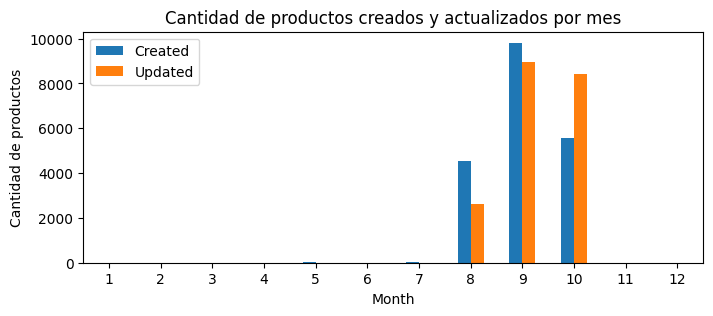

In [71]:
# Gráfico de barras comparando la cantidad de productos creados por año y actualizados por año
created_per_year = data_df['month_created'].value_counts().sort_index()
updated_per_year = data_df['month_updated'].value_counts().sort_index()

# Crear un DataFrame con los datos
comparison_df = pd.DataFrame({
    'Created': created_per_year,
    'Updated': updated_per_year
})

# Crear el gráfico de barras
comparison_df.plot(kind='bar', figsize=(8, 3))
plt.title('Cantidad de productos creados y actualizados por mes')
plt.xlabel('Month')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=0)
plt.show()

In [75]:
# Especifica la ruta donde deseas guardar el archivo CSV
ruta_guardado = 'D:/JENN/Maestria IACD/ETL/ETL_Class_workshop_II/data_cleaned_jenifer_ramos.csv'

# Guarda el DataFrame en un archivo CSV
data_df.to_csv(ruta_guardado, index=False)

print(f"Archivo guardado en: {ruta_guardado}")

Archivo guardado en: D:/JENN/Maestria IACD/ETL/ETL_Class_workshop_II/data_cleaned_jenifer_ramos.csv
